<div style="background-color:white;" >
<div style="clear: both; display: table;">
  <div style="float: left; width: 14%; padding: 5px; height:auto">
    <img src="img/TUBraunschweig_CO_200vH_300dpi.jpg" alt="TU_Braunschweig" style="width:100%">
  </div>
  <div style="float: left; width: 28%; padding: 5px; height:auto">
    <img src="img/TU_Clausthal_Logo.png" alt="TU_Clausthal" style="width:100%">
  </div>
  <div style="float: left; width: 25%; padding: 5px; height:auto">
    <img src="img/ostfalia.jpg" alt="Ostfalia" style="width:100%">
  </div>
  <div style="float: left; width: 21%; padding: 5px;">
    <img src="img/niedersachsen_rgb_whitebg.png" alt="Niedersachsen" style="width:100%">
  </div>
  <div style="float: left; width: 9%; padding: 5px;">
    <img src="img/internet_BMBF_gefoerdert_2017_en.jpg" alt="bmbf" style="width:100%">
  </div>
</div>
<div style="text-align:center">
<img src="img/ki4all.jpg" alt="KI4ALL-Logo" width="200"/>
</div>
</div>

# Synthetic Biomedical Data – Lesson 2a: Data Generation Basics (Part 1)

Part of the *Microcredit Artificial Data Generator* learning module.

➡️ [Back to Lesson 1: Introduction](01_intro.ipynb)
➡️ [Module Overview (README)](../README.md)

*Before continuing, please make sure you have reviewed the **prerequisites** and **learning goals** in Lesson 1.*

### Recap from Lesson 1
- Synthetic biomedical data is artificially generated but mimics statistical properties of real datasets.
- It allows us to know the *ground truth* (feature importance, class distributions, random effects).
- Useful for benchmarking, teaching, privacy-preserving research.

In Lesson 1, you learned why synthetic biomedical data is useful.
Now we create and explore our **first simple dataset**.

## Learning Goals (Lesson 2)

The goal of this lesson is to give you hands-on experience with creating small, controlled datasets that demonstrate the key concepts of synthetic biomedical data.
Later notebooks will expand this by introducing **pseudo-classes**, **random effects**, and more advanced data structures.

After completing this lesson, you will be able to:

1. **Generate** a simple synthetic biomedical dataset with controlled numbers of samples, features, and classes.
2. **Inspect** the structure of the dataset (features, labels, class balance) in a Pandas DataFrame.
3. **Visualize** data using scatterplots and histograms to explore class separability.
4. **Identify** which features appear informative and which behave like noise.
5. **Quantify** the strength of class separation using effect size measures (Cohen’s d, Cliff’s delta), and relate these values to visual impressions.
6. **Explain** why synthetic data provides a safe playground for learning and method testing before moving on to more complex cases.
---


## Lesson 2a: Data Generation Basics — First Dataset

In this notebook, we will move from theory to practice and learn how to **generate synthetic biomedical datasets** using Python.
You will see how simple tools (e.g., `scikit-learn`) can be used to create datasets that mimic the structure of real biomedical data while allowing full control over:

- **Number of samples** (patients, experiments, or observations)
- **Number of features** (biomarkers or measurements)
- **Number of classes** (e.g., healthy vs. diseased groups)
- **Feature importance** (which features carry useful information)
- **Noise and irrelevant features** (variables that add randomness or distraction)

###  Learning Goals
After completing this notebook, you will be able to:
1. Generate a synthetic dataset with `make_classification`.
2. Inspect the structure of the dataset (samples, features, labels).
3. Check the class distribution.
4. Visualize class separability with a simple scatterplot.

---

### Lesson 2a.1 — Generate a simple synthetic dataset

We will create a tiny synthetic dataset that imitates biomedical measurements:
- **Samples** ≈ patients
- **Features** ≈ biomarkers (e.g., gene expression levels)
- **Class** ≈ outcome (e.g., healthy vs. diseased)

This minimal example uses `sklearn.datasets.make_classification`, which lets us control:
- number of samples and features,
- how many features are truly informative,
- the number of classes.

> **Goal:** Get a quick, tangible dataset to explore (as a Pandas DataFrame).


In [1]:
# Lesson 2a: First Example – Generate a simple synthetic dataset

import pandas as pd
from sklearn.datasets import make_classification

# Generate a dataset with:
# - 30 samples (rows, like patients)
# - 8 features (columns, like biomarkers)
# - 2 informative features (really matter for classification)
# - 2 classes (e.g., healthy vs diseased)
# - class_sep=1.5 (how well classes are separated)
X, y = make_classification(
    n_samples=30,  # number of samples
    n_features=8,  # total number of features
    n_informative=2,  # only 2 features are informative
    n_classes=2,  # binary classification
    class_sep=1.5,  # how well classes are separated
    random_state=42,  # for reproducibility
)

# Put into a DataFrame for easier handling
feature_names = [f"feature_{i + 1}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df["class"] = y

# Show first rows
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,class
0,-0.753736,0.822060,1.896793,-2.218794,-2.369373,-0.055746,-0.245388,2.249427,0
1,0.787085,-1.191303,0.656554,-1.164050,-1.123397,0.115571,-0.974682,1.027547,0
2,0.714000,-1.070892,0.482472,1.419757,-0.523108,-2.432455,-0.223463,1.160963,1
3,0.473592,-1.550663,0.068563,1.162467,1.679801,0.559868,-1.062304,-1.737600,1
4,2.463242,-1.918771,-0.026514,1.203892,1.678668,0.505995,0.060230,-1.721743,1


#### Interpretation & Takeaways
- Each **row** is a sample (patient); each **feature_*** column is a biomarker.
- The **class** column is our target (0/1). At this point, the numbers are just synthetic values—what matters is the structure.
- We specified **2 informative features**; the others may behave like noise here.

**Reflection**
- How would changing `n_informative` or `n_features` affect downstream plots and model difficulty?
- What happens if you increase `n_samples` to 1000?


## 2a.2 Explore Class Balance (Label Distribution)

Before diving deeper into feature analysis, it is important to understand how many samples
belong to each class (e.g., **healthy** vs. **diseased**). This is called the **class balance / label distribution**.

---

### Why check class imbalance?

- **Baseline understanding:**
  If one class has 80 samples and the other has 20, we already know the dataset is imbalanced.

- **Impact on machine learning models:**
  - In a **balanced dataset** (e.g., 50 healthy, 50 diseased), most models can learn both classes equally well.
  - In an **imbalanced dataset** (e.g., 95 healthy, 5 diseased), a naïve model could simply predict *all samples as healthy* and still achieve 95% accuracy — but it would be useless for detecting disease.

- **Evaluation metrics:**
  With imbalanced data, **accuracy alone is misleading**.
  We then need other metrics like **precision, recall, F1-score, ROC-AUC** to judge performance fairly.

- **Synthetic data advantage:**
  With generated data, we can **control class balance**.
  - Want to simulate a rare disease? Generate 5% diseased, 95% healthy.
  - Want to test fairness? Generate equal class sizes.

---

### What to do in this step
1. Count how many samples belong to each class (e.g., using `value_counts()` in Pandas).
2. Plot the counts (optional: bar chart or pie chart).
3. Reflect: Is the dataset balanced or skewed?

---

### Quick Takeaway
- Always start by checking class balance.
- Class balance affects how models learn and how performance should be measured.
- Synthetic datasets let us experiment with both balanced and imbalanced cases,
  something that is often hard with real biomedical data.

In [2]:
# Count samples per class
class_counts = df["class"].value_counts()
print("Class balance (counts):")
print(class_counts)

Class balance (counts):
class
0    15
1    15
Name: count, dtype: int64


#### Interpretation
- The printed counts show how many samples belong to each class.
- The bar chart provides a quick visual overview of balance.

**Reflection**
- Is the dataset balanced or skewed?
- If one class dominates, how might this affect model training?
- In biomedical research, rare diseases often mean highly imbalanced datasets.
  How could synthetic data help simulate and study such cases?


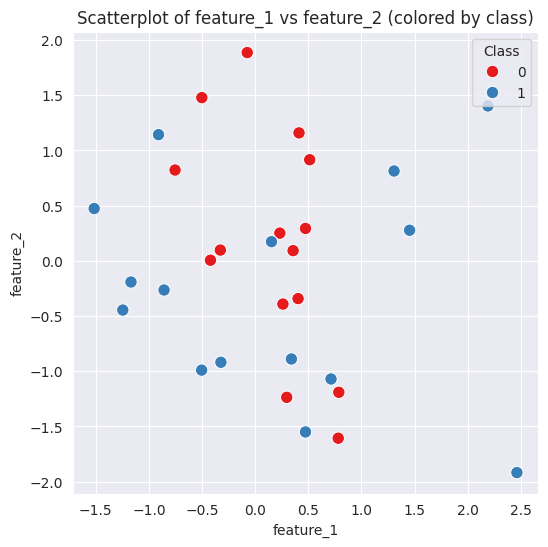

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot of two selected features, colored by class
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="feature_1", y="feature_2", hue="class", palette="Set1", s=80)
plt.title("Scatterplot of feature_1 vs feature_2 (colored by class)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend(title="Class")
plt.show()

#### Interpretation
- Each point = one sample.
- The position shows the feature values (x = feature_1, y = feature_2).
- The color shows the class label.

If the two classes form **separate clusters**, the features are informative.
If they **overlap**, then these features alone may not be enough for good classification.

---

**Reflection**
- Try plotting different pairs of features (e.g., `feature_3` vs `feature_4`).
  - Do some feature pairs separate the classes better than others?
- What happens if you regenerate the dataset with a larger `class_sep` value?
  - Does the scatterplot show clearer separation?
- In real biomedical data, why is it rare to see perfect separation in 2D plots?


## 2a.3 Scatterplot of Two Features

So far, we have looked at class sizes, but not yet at how features
help us distinguish between classes. A **scatterplot** is a simple way
to explore **class separability** in two dimensions.

---

### What is a scatterplot?
- Each **point** in the plot = one sample (e.g., one patient).
- The **x-axis** and **y-axis** each represent a feature (e.g., biomarker_1 vs biomarker_2).
- The **color** of each point indicates the class label (e.g., healthy = red, diseased = blue).

This lets us see whether the two classes overlap or form distinct clusters.

---

### Why this matters
- If the classes are **clearly separated** in the scatterplot:
  - A simple model (like a straight line) may already do well.
- If the classes **overlap strongly**:
  - Classification will be harder.
  - We may need more complex models or additional features.
- In real biomedical data, perfect separation is rare — so synthetic data
  gives us a safe way to practice with both easy and hard cases.

---

### What to do in this step
1. Choose two feature columns (e.g., `feature_1` and `feature_2`).
2. Plot them against each other in a scatterplot.
3. Color the points by their class label.
4. Inspect whether classes cluster or overlap.

**Tip:** If the plot looks very mixed, try generating the data with a larger `class_sep` (e.g., `class_sep=2.0`) or choose a pair of more **informative** features.

---

### Quick Takeaway
A scatterplot provides an **intuitive first view** of how separable
two classes are. It builds intuition for what models will later try to do:
draw a **decision boundary** that best separates the classes.


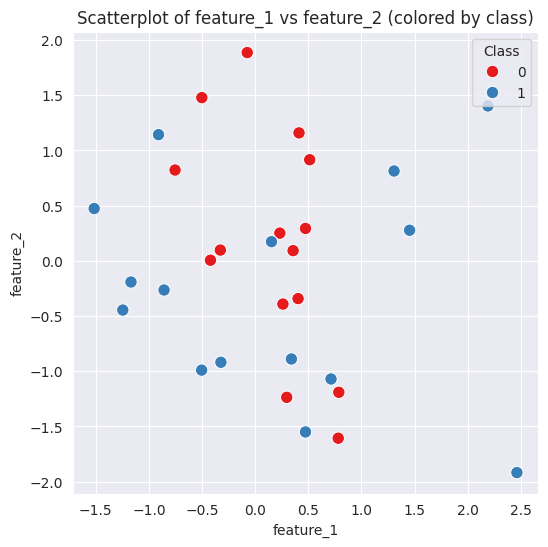

In [4]:
# Scatterplot of two selected features, colored by class
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="feature_1", y="feature_2", hue="class", palette="Set1", s=80)
plt.title("Scatterplot of feature_1 vs feature_2 (colored by class)")
plt.xlabel("feature_1")
plt.ylabel("feature_2")
plt.legend(title="Class")
plt.show()

#### Interpretation
- Each point = one sample.
- The position shows the feature values (x = feature_1, y = feature_2).
- The color shows the class label.

If the two classes form **separate clusters**, the features are informative.
If they **overlap**, then these features alone may not be enough for good classification.

---

**Reflection**
- Try plotting different pairs of features (e.g., `feature_3` vs `feature_4`).
  - Do some feature pairs separate the classes better than others?
- What happens if you regenerate the dataset with a larger `class_sep` value?
  - Does the scatterplot show clearer separation?
- In real biomedical data, why is it rare to see perfect separation in 2D plots?


## Quick Takeaway from Lesson 2a

- We can easily **generate** a synthetic dataset with controlled numbers of samples, features, and classes.
- By checking the **class distribution**, we ensure the dataset is balanced (or intentionally imbalanced).
- A **scatterplot of two features** gives a first intuitive sense of whether classes are separable.
- In synthetic data, we can control how difficult separation is, which makes it a safe playground to explore basic ML concepts.

---

## Next Steps

In the next notebook (**Lesson 2b: Feature Distributions and Effect Size**),
we will go beyond single scatterplots and explore **all features** in more detail:

- Visualize class-conditional distributions for each feature.
- Identify which features are informative and which behave like noise.
- Quantify differences between groups using **effect size measures** (Cohen’s d, Cliff’s delta).
- Connect visual impressions to numeric measures of separation.

➡️ Continue with: **[`02b_feature_distributions_effect_size.ipynb`](02b_feature_distributions_effect_size.ipynb)**
